In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

seed = 1
np.random.seed(seed) # ensure same result for testing purpose

In [2]:
#load the dataset
cardiovascular = pd.read_csv('dataset.csv')

# Data Exploration and Visualizing

In [3]:
cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [4]:
print(cardiovascular.head()) # First 5 data
cardiovascular_shape = cardiovascular.shape
row_count = cardiovascular_shape[0]
col_count = cardiovascular_shape[1]
print(f"Shape: {cardiovascular_shape}")
print(f"Total of {row_count} records")
print(f"Total of {col_count} Columns")

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular_risk(y)  
0         3      rar

In [5]:
# Check for null values
cardiovascular.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [6]:
# Seperates to categorial and numberics for visualization purpose
cardiovascular_num = cardiovascular.select_dtypes(exclude="object")
cardiovascular_cat = cardiovascular.select_dtypes(include="object")

# Some data are numeric but can be analyse as categorical for visualization
cardiovascular_numeric_cat = cardiovascular[["Vege_day", "Meals_day", "Exercise"]]

print(cardiovascular_num.info(), end="\n\n")
print(cardiovascular_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2100 non-null   int64  
 1   Height(cm)       2100 non-null   float64
 2   Weight(kg)       2100 non-null   float64
 3   Vege_day         2100 non-null   int64  
 4   Meals_day        2100 non-null   int64  
 5   Water_intake(L)  2100 non-null   float64
 6   Exercise         2100 non-null   int64  
 7   Income           2100 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 131.4 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2100 non-null   object
 1   Family_history          2100 non-null   object
 2   Alcohol                 2100 non-null   object
 3   Junk

In [7]:
cardiovascular_num.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


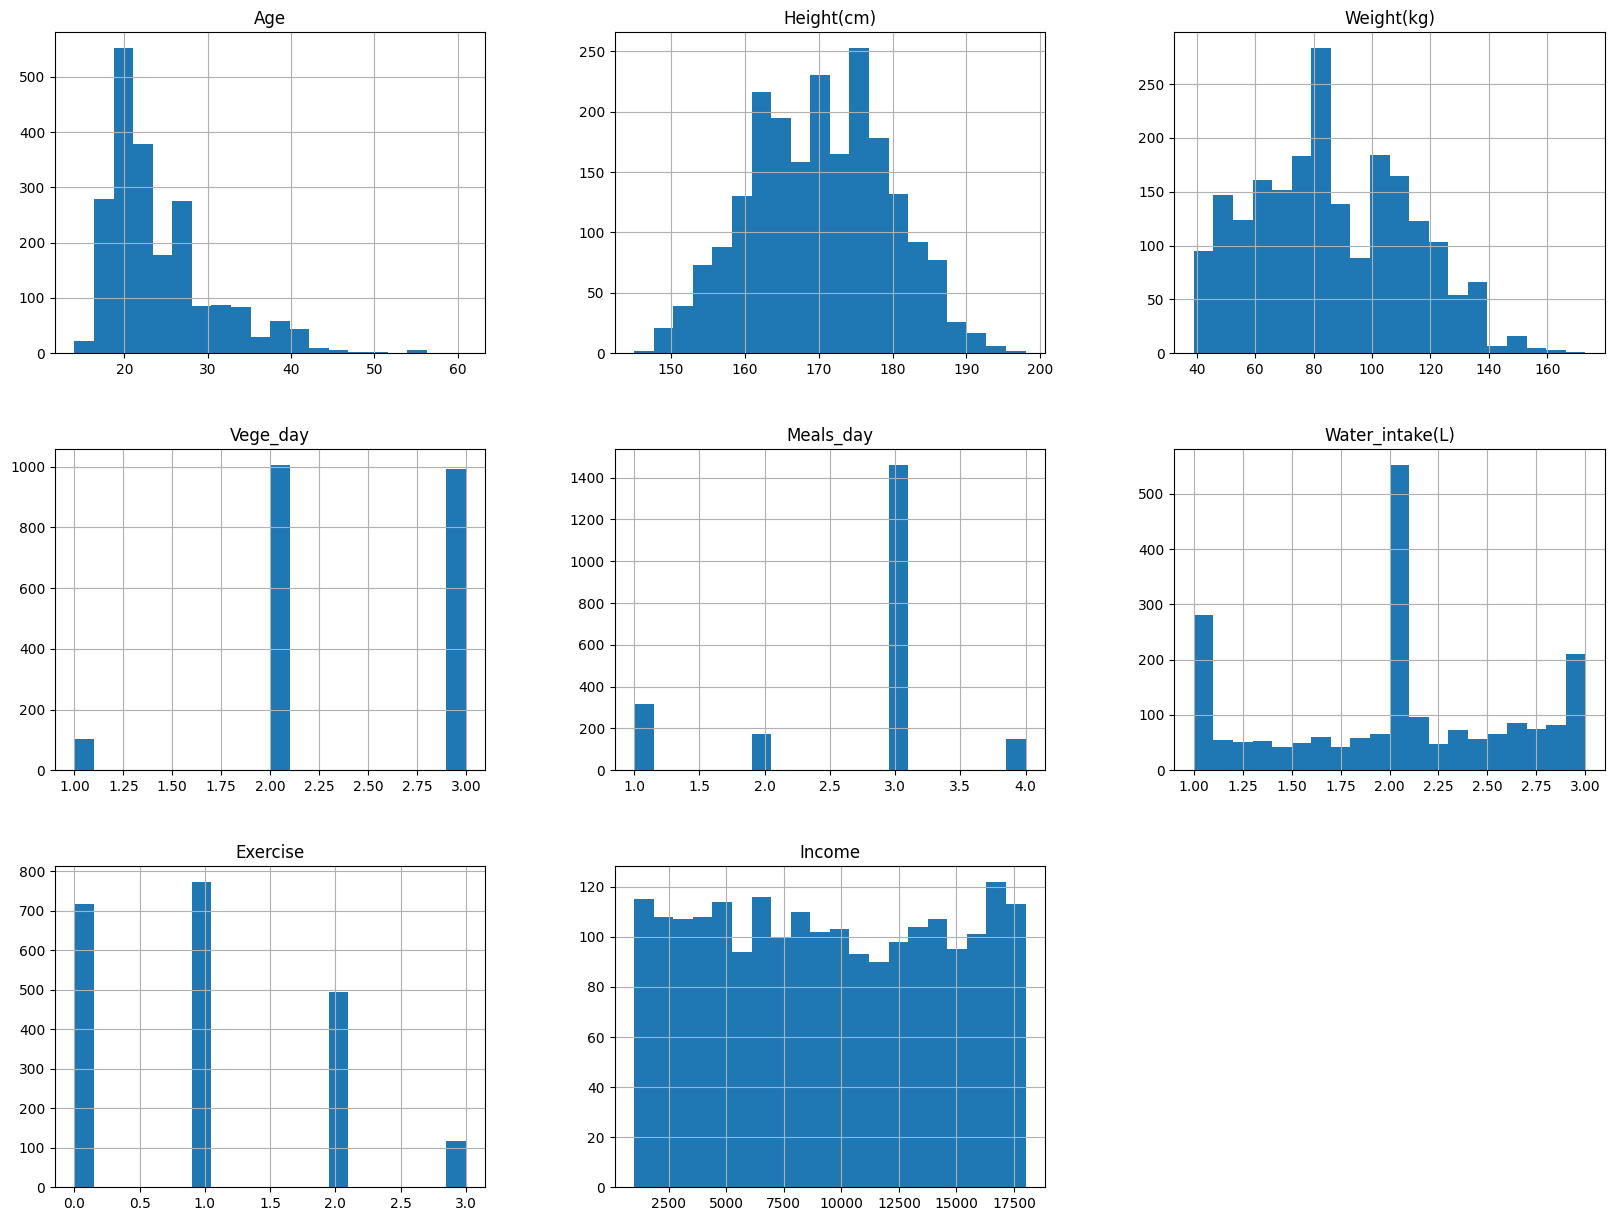

In [8]:
# Plot histogram for numerical columns
cardiovascular_num.hist(bins=20, figsize=(20,15))
plt.show()

                     Skew
Age              1.527517
Height(cm)      -0.008299
Weight(kg)       0.255598
Vege_day        -0.431385
Meals_day       -1.067331
Water_intake(L) -0.103556
Exercise         0.458999
Income           0.031238
Age


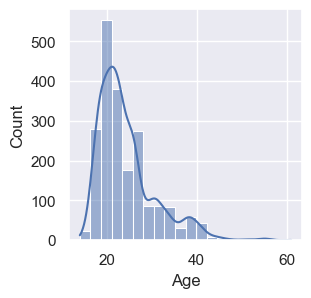

Height(cm)


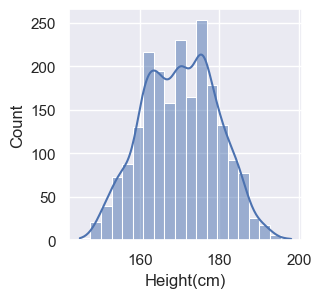

Weight(kg)


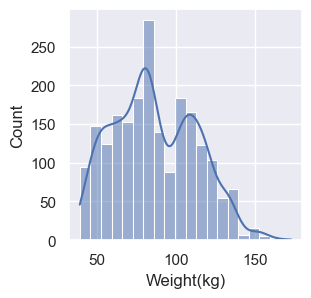

Vege_day


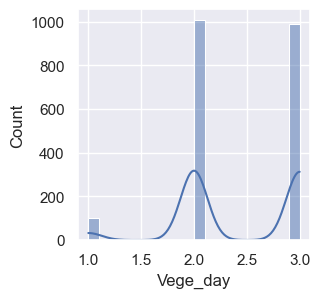

Meals_day


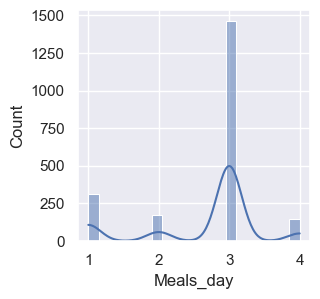

Water_intake(L)


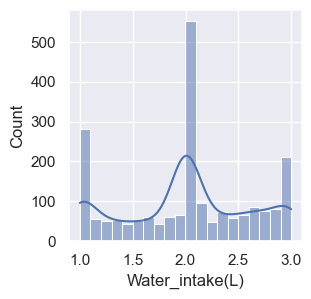

Exercise


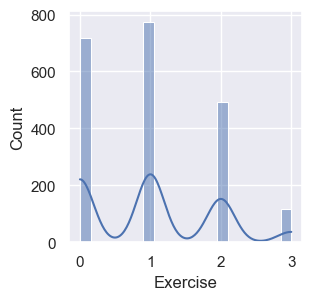

Income


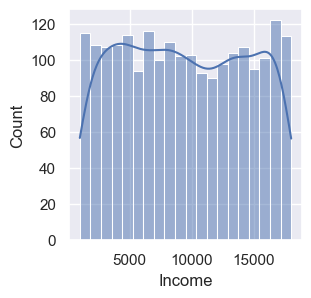

In [9]:
# Check the skewness of the data
skew = cardiovascular_num.skew()
skewness = pd.DataFrame(data=skew, columns=["Skew"])
print(skewness)
sns.set(rc = {"figure.figsize": (3, 3)})

for col in cardiovascular_num:
    print(col)
    sns.histplot(cardiovascular[col], bins=20, kde=True)
    plt.show()

In [10]:
# Check the categorical data
cardiovascular_cat_visualise = cardiovascular_cat.columns.union(cardiovascular_numeric_cat.columns)
for col in (cardiovascular_cat_visualise):
    print(cardiovascular[col].value_counts().sort_index())
    print()

Alcohol
high         1
low       1394
medium      70
none       635
Name: count, dtype: int64

Cardiovascular_risk(y)
high      967
low       557
medium    576
Name: count, dtype: int64

Discipline
no     2004
yes      96
Name: count, dtype: int64

Exercise
0    716
1    773
2    493
3    118
Name: count, dtype: int64

Family_history
no      385
yes    1715
Name: count, dtype: int64

Gender
Female    1040
Male      1060
Name: count, dtype: int64

Junk_food
no      245
yes    1855
Name: count, dtype: int64

Meals_day
1     315
2     175
3    1462
4     148
Name: count, dtype: int64

Smoking
no     2056
yes      44
Name: count, dtype: int64

Snack
Always          53
Frequently     242
No              51
Sometimes     1754
Name: count, dtype: int64

TV
moderate    910
often       243
rare        947
Name: count, dtype: int64

Transportation
bicycle          6
bus           1573
car            454
motorcycle      11
walk            56
Name: count, dtype: int64

Vege_day
1     102
2    1007

Age


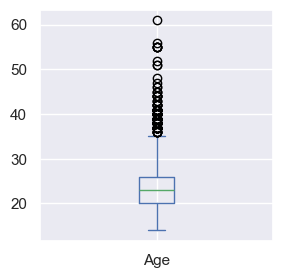

Height(cm)


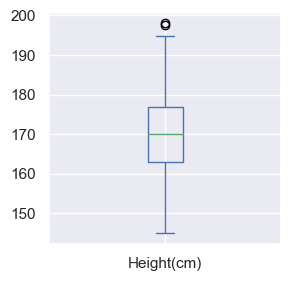

Income


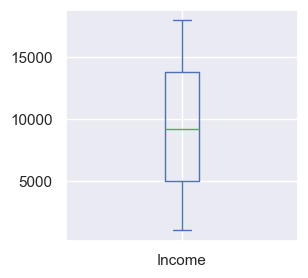

Water_intake(L)


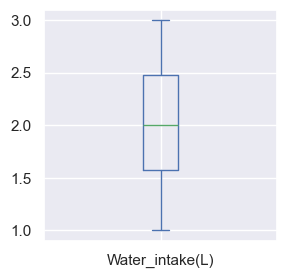

Weight(kg)


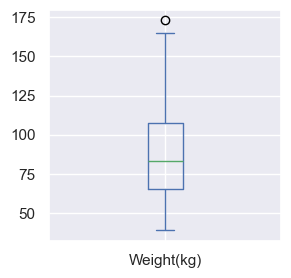

In [11]:
for col in cardiovascular_num.columns.difference(cardiovascular_numeric_cat.columns):
    print(col)
    cardiovascular[col].plot.box(figsize = (3, 3))
    plt.show()

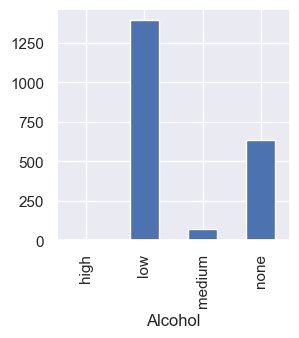

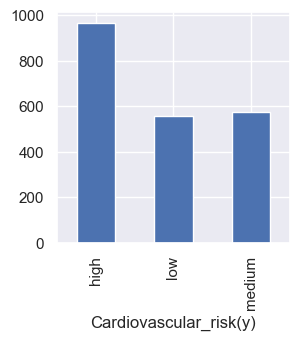

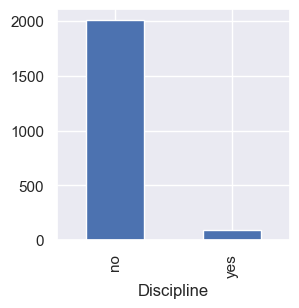

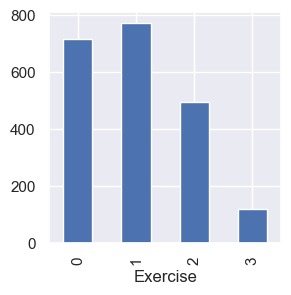

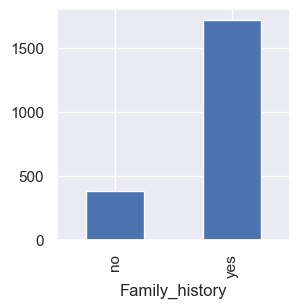

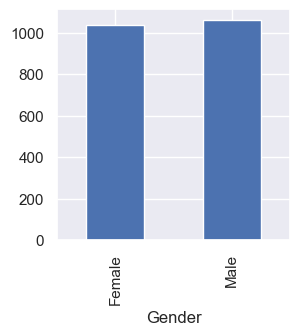

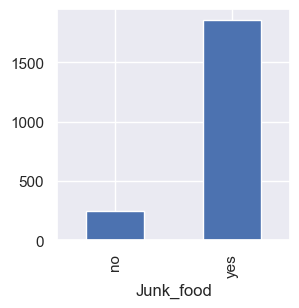

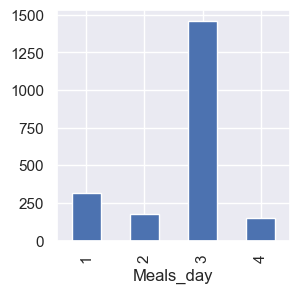

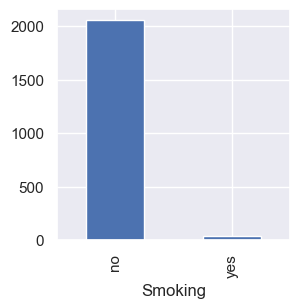

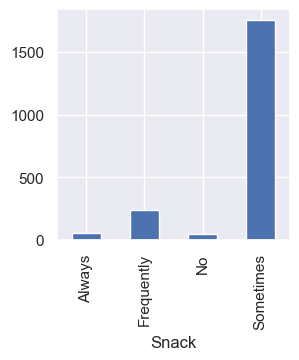

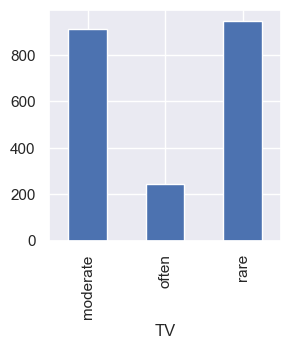

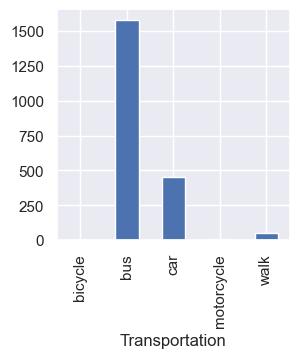

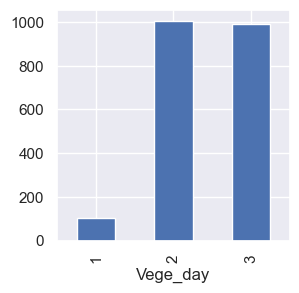

In [12]:
for col in cardiovascular_cat_visualise:
    cardiovascular[col].value_counts().sort_index().plot(kind="bar")
    plt.show()

# Data Preprocessing

In [13]:
# Check for null values
cardiovascular.isnull().sum()

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

<b>Since there is no null value, we just perform to seperate the datasets</b>

In [14]:
# Seperate X and y
X = cardiovascular.drop("Cardiovascular_risk(y)", axis = 1)
y = cardiovascular["Cardiovascular_risk(y)"]

In [15]:
# Print shape of X and y
print ('Dataset:', cardiovascular.shape)
print ('X: shape=', X.shape)
print ('y: shape=', y.shape)

Dataset: (2100, 18)
X: shape= (2100, 17)
y: shape= (2100,)


In [16]:
# Split numerical and categorical sets
X_num = X.select_dtypes(exclude="object")
X_cat = X.select_dtypes("object")

print('X_num shape:', X_num.shape)
print('X_cat shape:', X_cat.shape)

X_num shape: (2100, 8)
X_cat shape: (2100, 9)


In [17]:
# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_num)
X_num = scaler.transform(X_num)

In [18]:
# Make sure it is standardized
print('>>> Mean of all columns:\n', X_num.mean(axis=0))
print('\n>>> Std of all columns:\n', X_num.std(axis=0))

>>> Mean of all columns:
 [-2.57148800e-16 -5.48978852e-16  1.15040252e-16 -5.92118946e-17
 -1.42108547e-16 -2.28388736e-16  1.19269674e-16 -3.97565578e-17]

>>> Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
#Encoding the categorical feature into its one-hot representation
from sklearn.preprocessing import OneHotEncoder

# Using OneHotEncoder to encode multiple categorical features
encoder = OneHotEncoder(sparse_output=False)
X_cat = encoder.fit_transform(X_cat)

In [20]:
print('Shape of X_cat:', X_cat.shape, '\n')
print(X_cat, '\n')

Shape of X_cat: (2100, 26) 

[[1. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]] 



In [21]:
# Stack the categorical data back to the set
X_coded = np.hstack([X_num, X_cat])

print('X_coded shape:', X_coded.shape)
print('y shape:', y.shape)

X_coded shape: (2100, 34)
y shape: (2100,)


In [22]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.2, random_state=seed)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1680, 34)
(1680,)
(420, 34)
(420,)


# Model Training

In [34]:
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

def showConfusionMatirx(cm):
    labels = ['low', 'medium', 'high']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    group = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    group = np.asarray(group).reshape(cm.shape)
    fig, ax = plt.subplots(figsize=(8, 8))
    cax = ax.imshow(cm, cmap="Blues")
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, group[i, j], ha='center', va='center', color='black')

    ax.set_title('Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
def showPrecisionRecall(X_set, y_set, model, classes):
    y_bin = label_binarize(y_set, classes=classes)
    n_classes = len(classes)

    y_score = model.predict_proba(X_set)
    
    # precision recall curve
    precision = dict()
    recall = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label=classes[i])

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

def showRocCurve(fpr, tpr, roc_auc, classes):
    n_classes = len(classes)

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)

# Train the model
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [26]:
# Predict on the training set
from sklearn.metrics import accuracy_score

y_pred = forest_classifier.predict(X_train)

train_acc = accuracy_score(y_train, y_pred)

print(f"Training accuracy: {train_acc:.4f}")
print()
print(y_train.value_counts())

Training accuracy: 1.0000

Cardiovascular_risk(y)
high      775
medium    469
low       436
Name: count, dtype: int64


In [27]:
print(f"The model can achieve at most {775/1680:.4f} accuracy if all predicted values are 'medium'.")

The model can achieve at most 0.4613 accuracy if all predicted values are 'medium'.


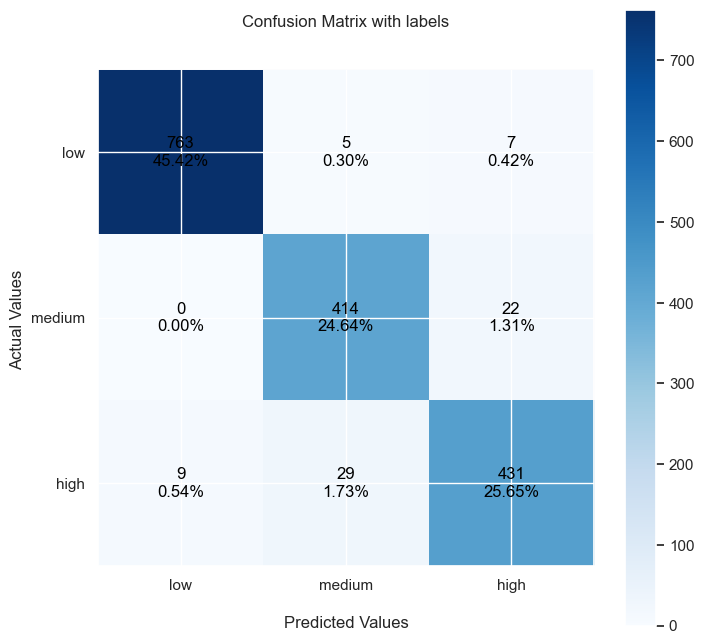

In [28]:
# Do cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
cv_count = 5;

y_pred_cv = cross_val_predict (forest_classifier, X_train, y_train, cv=cv_count)
cm = confusion_matrix(y_train, y_pred_cv)
showConfusionMatirx(cm)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

precisions = precision_score(y_train, y_pred_cv, average=None)
recalls = recall_score (y_train, y_pred_cv, average=None)
f1_scores = f1_score(y_train, y_pred_cv, average=None)
print(f'precision = {precisions}')
print(f'recall    = {recalls}')
print(f'f1 score  = {f1_scores}')

precision = [0.98834197 0.92410714 0.93695652]
recall    = [0.98451613 0.94954128 0.91897655]
f1 score  = [0.98642534 0.93665158 0.92787944]


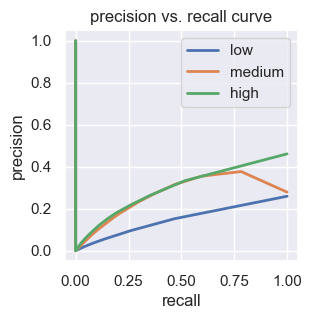

In [35]:
classes = ["low", "medium", "high"]
showPrecisionRecall(X_train, y_train, forest_classifier, classes)
# plot_precision_vs_recall(precisions, recalls)

## SVM

## SGD